In [181]:
import cv2 # OpenCV library
import numpy as np # Numpy library for scientific computing
import matplotlib.pyplot as plt # Matplotlib library for plotting

MAZE_FILE_NAME = "../Maze.png"
ROBOT_FILE_NAME = "../Robot.png"
#MAZE_FILE_NAME = "../testImages/MAZE_TEST_10.png"
#ROBOT_FILE_NAME = "../testImages/ROBOT_TEST_10.png"
MAP_FILE_NAME = "../MapFound.txt"

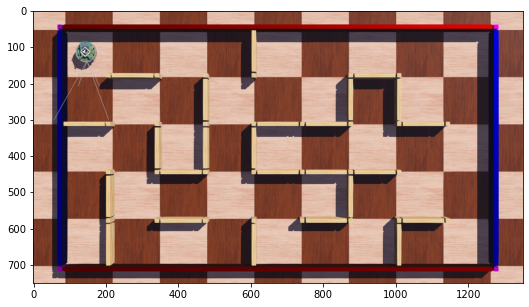

[ 11  59 228]


In [182]:
#=================== 3.1 Read and display the maze

img = cv2.imread(MAZE_FILE_NAME)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (9, 5))
plt.imshow(img_rgb)
plt.show()

# find cornerstone hue value
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # read image in HSV
px_hsv = img_hsv[234, 1049]                       # pixel value at row, column
print(px_hsv)

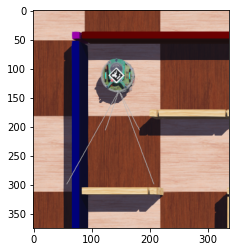

In [183]:
#=================== 3.2 Find cornerstones 

# first analyse the top-left ROI

ROI_bgr = img[0:375, 0:338] # region of interest - rows: 0-375, columns: 0-338
ROI_rgb = cv2.cvtColor(ROI_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(ROI_rgb)
plt.show()

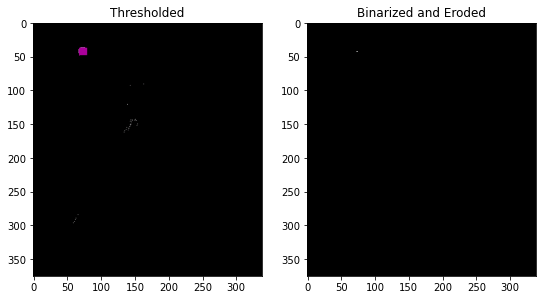

In [184]:
# set minimum and maximum HSV values to display
lower = np.array([143, 0, 120])
upper = np.array([151, 255, 255])

# convert to HSV
ROI_hsv = cv2.cvtColor(ROI_bgr, cv2.COLOR_BGR2HSV)

# perform colour threshold
mask = cv2.inRange(ROI_hsv, lower, upper)
result = cv2.bitwise_and(ROI_bgr, ROI_bgr, mask=mask)

# binarize
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,1,255,cv2.THRESH_BINARY)

# erode
kernel = np.ones((3,3), np.uint8)
while 1:
    if cv2.countNonZero(binary) == 0:
        break
    temp = binary.copy()
    binary = cv2.erode(binary, kernel)
    
# plot
fig, (ax1, ax2) = plt.subplots(figsize = (9, 5), ncols = 2)
ax1.imshow(result), ax1.set_title("Thresholded")
ax2.imshow(temp, cmap='gray'), ax2.set_title("Binarized and Eroded")
plt.show()

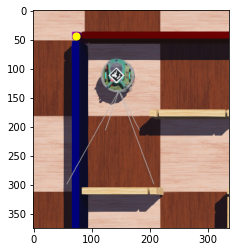

[[43. 73.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


In [185]:
# scan eroded image for a non-black pixel
i = 0
j = 0
flag = 0
for row in range(0,375):
    for col in range(0,338):
        if temp[row,col] != 0:
            i = row
            j = col
            flag = 1
            break
    if flag == 1:
        break
            
# place marker at found location
plt.figure()
plt.imshow(ROI_rgb)
plt.scatter(j, i, s=50, c='yellow', marker='o')
plt.show()

# save location of cornerstone
cstoneLocations = np.zeros((4, 2))   
cstoneLocations[0,0] = i
cstoneLocations[0,1] = j
print(cstoneLocations)

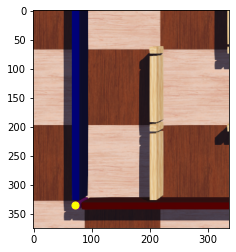

[[ 43.  73.]
 [711.  72.]
 [  0.   0.]
 [  0.   0.]]


In [186]:
# repeat process for the 3 remaining ROI
# bottom-left ROI


ROI_bgr = img[375:750, 0:338]
ROI_rgb = cv2.cvtColor(ROI_bgr, cv2.COLOR_BGR2RGB)

# convert to HSV
ROI_hsv = cv2.cvtColor(ROI_bgr, cv2.COLOR_BGR2HSV)

# perform colour threshold
mask = cv2.inRange(ROI_hsv, lower, upper)
result = cv2.bitwise_and(ROI_bgr, ROI_bgr, mask=mask)

# binarize
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,1,255,cv2.THRESH_BINARY)

# erode
kernel = np.ones((3,3), np.uint8)
while 1:
    if cv2.countNonZero(binary) == 0:
        break
    temp = binary.copy()
    binary = cv2.erode(binary, kernel)
    
# scan eroded image for a non-black pixel
i = 0
j = 0
flag = 0
for row in range(0,375):
    for col in range(0,338):
        if temp[row,col] != 0:
            i = row
            j = col
            flag = 1
            break
    if flag == 1:
        break
            
# place marker at found location
plt.figure()
plt.imshow(ROI_rgb)
plt.scatter(j, i, s=50, c='yellow', marker='o')
plt.show()

# save location of cornerstone
cstoneLocations[1,0] = i+375
cstoneLocations[1,1] = j
print(cstoneLocations)

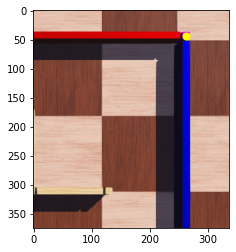

[[  43.   73.]
 [ 711.   72.]
 [  43. 1275.]
 [   0.    0.]]


In [187]:
# top-right ROI


ROI_bgr = img[0:375, 1012:1350]
ROI_rgb = cv2.cvtColor(ROI_bgr, cv2.COLOR_BGR2RGB)

# convert to HSV
ROI_hsv = cv2.cvtColor(ROI_bgr, cv2.COLOR_BGR2HSV)

# perform colour threshold
mask = cv2.inRange(ROI_hsv, lower, upper)
result = cv2.bitwise_and(ROI_bgr, ROI_bgr, mask=mask)

# binarize
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,1,255,cv2.THRESH_BINARY)

# erode
kernel = np.ones((3,3), np.uint8)
while 1:
    if cv2.countNonZero(binary) == 0:
        break
    temp = binary.copy()
    binary = cv2.erode(binary, kernel)
    
# scan eroded image for a non-black pixel
i = 0
j = 0
flag = 0
for row in range(0,375):
    for col in range(0,338):
        if temp[row,col] != 0:
            i = row
            j = col
            flag = 1
            break
    if flag == 1:
        break
            
# place marker at found location
plt.figure()
plt.imshow(ROI_rgb)
plt.scatter(j, i, s=50, c='yellow', marker='o')
plt.show()

# save location of cornerstone
cstoneLocations[2,0] = i
cstoneLocations[2,1] = j+1012
print(cstoneLocations)

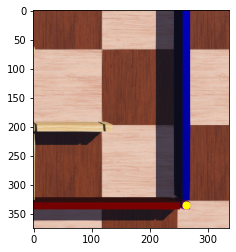

[[  43.   73.]
 [ 711.   72.]
 [  43. 1275.]
 [ 711. 1275.]]


In [188]:
# bottom-right ROI


ROI_bgr = img[375:750, 1012:1350]
ROI_rgb = cv2.cvtColor(ROI_bgr, cv2.COLOR_BGR2RGB)

# convert to HSV
ROI_hsv = cv2.cvtColor(ROI_bgr, cv2.COLOR_BGR2HSV)

# perform colour threshold
mask = cv2.inRange(ROI_hsv, lower, upper)
result = cv2.bitwise_and(ROI_bgr, ROI_bgr, mask=mask)

# binarize
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,1,255,cv2.THRESH_BINARY)

# erode
kernel = np.ones((3,3), np.uint8)
while 1:
    if cv2.countNonZero(binary) == 0:
        break
    temp = binary.copy()
    binary = cv2.erode(binary, kernel)
    
# scan eroded image for a non-black pixel
i = 0
j = 0
flag = 0
for row in range(0,375):
    for col in range(0,338):
        if temp[row,col] != 0:
            i = row
            j = col
            flag = 1
            break
    if flag == 1:
        break
            
# place marker at found location
plt.figure()
plt.imshow(ROI_rgb)
plt.scatter(j, i, s=50, c='yellow', marker='o')
plt.show()

# save location of cornerstone
cstoneLocations[3,0] = i+375
cstoneLocations[3,1] = j+1012
print(cstoneLocations)

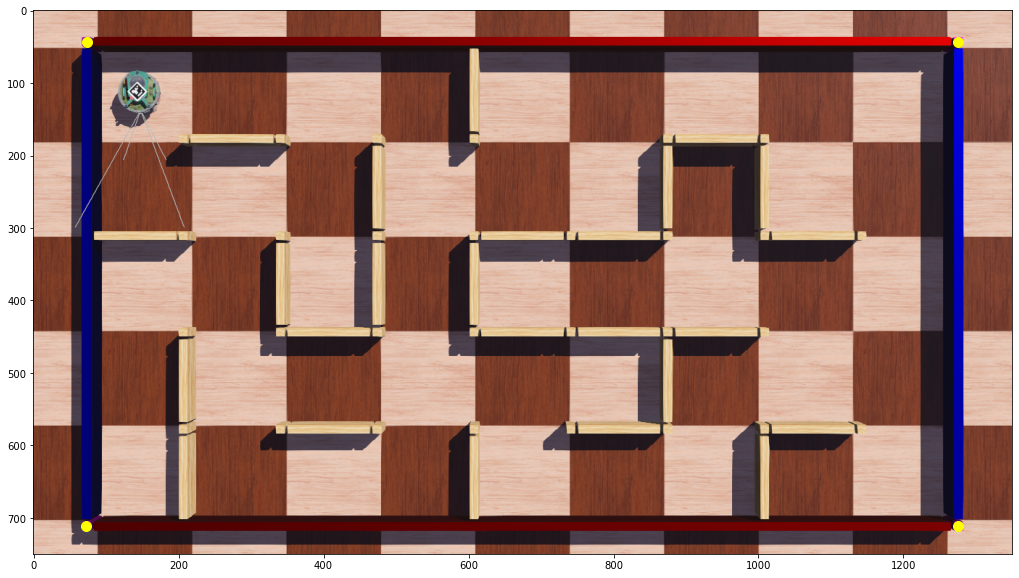

In [189]:
# cornerstones shown
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (18, 10))
plt.imshow(img_rgb)
plt.scatter(cstoneLocations[:,1], cstoneLocations[:,0], s=100, c='yellow', marker='o')
plt.show()

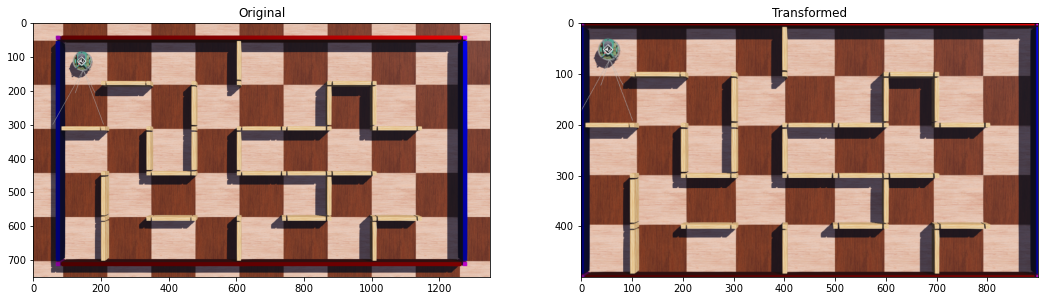

In [190]:
#=================== 3.3 Perspective transform

flip = np.zeros((4, 2))   
flip[:,0] = cstoneLocations[:,1]
flip[:,1] = cstoneLocations[:,0]

pts1 = np.float32([flip[0,:],flip[1,:],flip[2,:],flip[3,:]]) # four points on the first image
pts2 = np.float32([[0,0],[0,500],[900,0],[900,500]]) # four points on the second image

H = cv2.getPerspectiveTransform(pts1,pts2) # homography matrix
warped_rgb = cv2.warpPerspective(img_rgb, H, (900,500))

fig, (ax1, ax2) = plt.subplots(figsize = (18, 10), ncols = 2)
ax1.imshow(img_rgb), ax1.set_title("Original")
ax2.imshow(warped_rgb), ax2.set_title("Transformed")
plt.show()

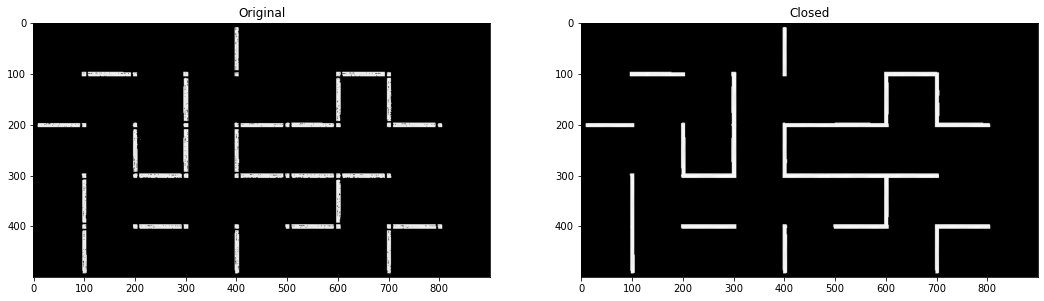

In [191]:
#=================== 3.4 Internal wall detection

# convert to HSV
warped_hsv = cv2.cvtColor(warped_rgb, cv2.COLOR_RGB2HSV)

# perform colour threshold
lower = np.array([16, 0, 220])
upper = np.array([19, 255, 255])
mask = cv2.inRange(warped_hsv, lower, upper)
result = cv2.bitwise_and(warped_rgb, warped_rgb, mask=mask)

# convert to grayscale
result = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)
result = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

# close weak links
closing = cv2.morphologyEx(result, cv2.MORPH_CLOSE, kernel, iterations=5)

# remove any remaining salt noise 
new = cv2.erode(closing, kernel)
new = cv2.morphologyEx(new, cv2.MORPH_CLOSE, kernel)
walls_gray = cv2.dilate(new, kernel)

fig, (ax1, ax2) = plt.subplots(figsize = (18, 10), ncols = 2)
ax1.imshow(result, cmap='gray'), ax1.set_title("Original")
ax2.imshow(walls_gray, cmap='gray'), ax2.set_title("Closed")
plt.show()

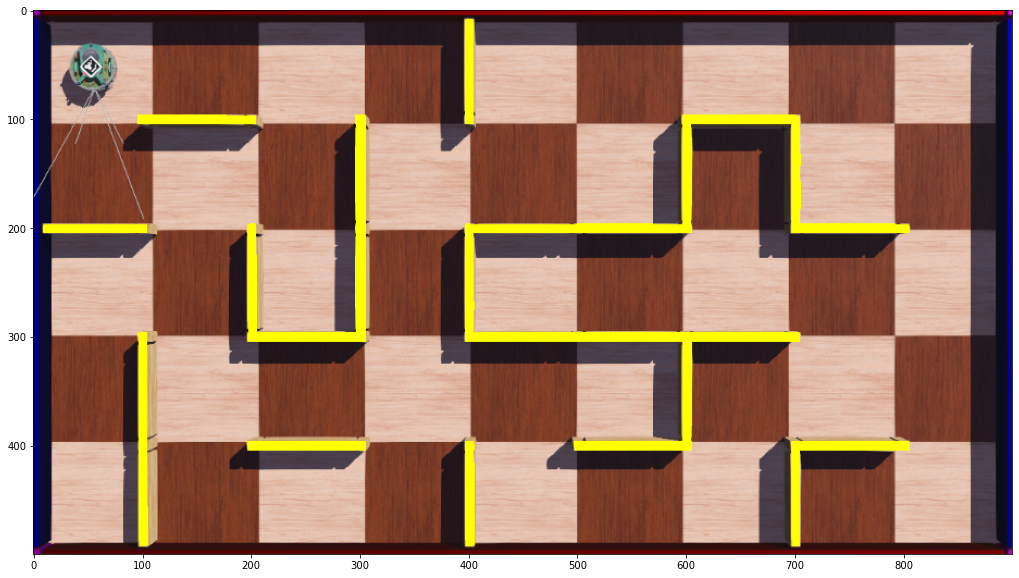

In [192]:
# indicate walls in yellow
yellow = np.array([30, 255, 255])
showWalls = warped_hsv.copy()

for row in range(0,500):
    for col in range(0,900):
        if walls_gray[row,col] != 0:
            showWalls[row,col] = yellow
            
showWalls = cv2.cvtColor(showWalls, cv2.COLOR_HSV2RGB)

plt.figure(figsize = (18, 10))
plt.imshow(showWalls)
plt.show()

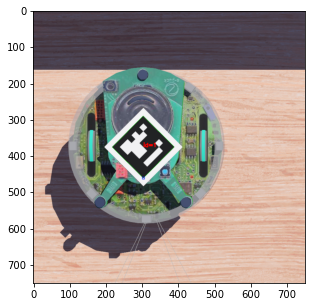

In [193]:
#=================== 3.5 Detect robot location and heading

img_robot = cv2.imread(ROBOT_FILE_NAME)
img_robot_rgb = cv2.cvtColor(img_robot,cv2.COLOR_BGR2RGB)

# detect the marker
dictionary = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_250)
parameters =  cv2.aruco.DetectorParameters_create()
markerCorners, markerIds, rejectedCandidates = cv2.aruco.detectMarkers(img_robot_rgb, dictionary, parameters=parameters)

img_robot_rgb = cv2.aruco.drawDetectedMarkers(img_robot_rgb, markerCorners, markerIds)

plt.figure(figsize = (9, 5))
plt.imshow(img_robot_rgb)
plt.show()

In [194]:
# use location of opposite corners to determine the heading

colDiff = markerCorners[0][0][0,0] - markerCorners[0][0][2,0]
rowDiff = markerCorners[0][0][0,1] - markerCorners[0][0][2,1]
heading = ''

# facing north or south 
if abs(rowDiff) > abs(colDiff):
    if rowDiff > 0:
        heading = ' v '
    else:
        heading = ' ^ '
    
# facing east or west
else:
    if colDiff > 0:
        heading = ' > '
    else:
        heading = ' < '
        
print(heading)
    

 v 


TL


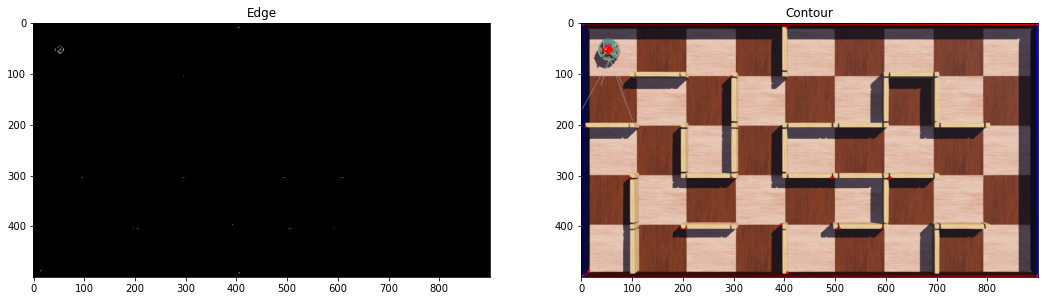

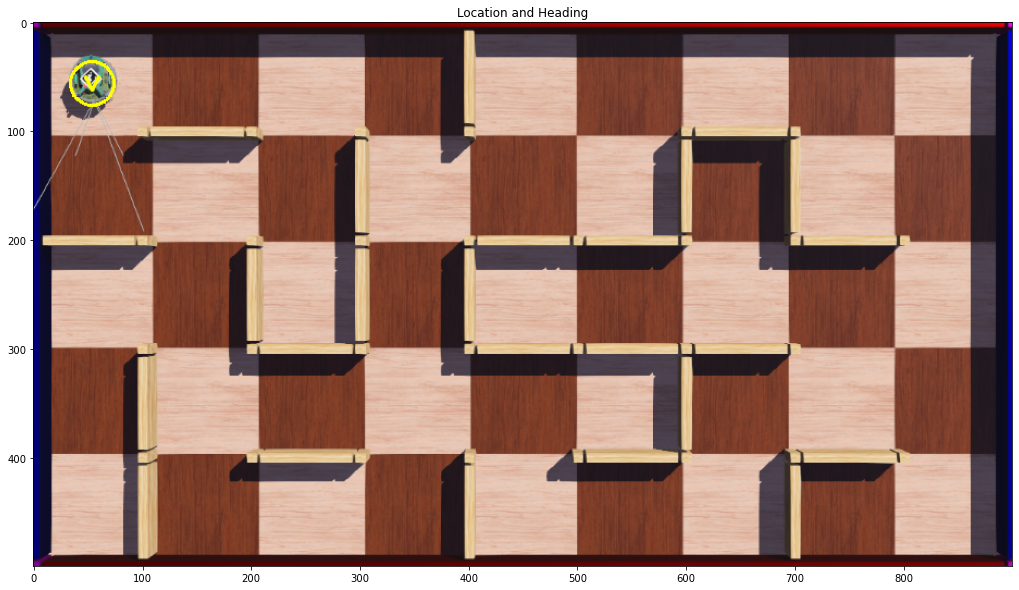

In [195]:
# find robot location

location = ''

maze = warped_rgb.copy()
warped_rgb_orig = warped_rgb.copy()
maze_gray = cv2.cvtColor(maze,cv2.COLOR_RGB2GRAY)         

#canny edge detection
edges = cv2.Canny(maze_gray, threshold1 = 800, threshold2 = 950, apertureSize = 3)
           
#contour detection
img2, contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(maze, contours, -1, (255, 0, 0), 3)

#plot the image
fig, (ax1, ax2) = plt.subplots(figsize = (18, 10), ncols = 2)
ax1.imshow(edges, cmap='gray'), ax1.set_title("Edge")
ax2.imshow(maze), ax2.set_title("Contour")


#calculate moments and areas
col_centr = 0
row_centr = 0

for i, cnt in enumerate(contours):
    m = cv2.moments(cnt)
    area = cv2.contourArea(cnt)
    #print("shape", i, ": m00 -", m['m00'], " area -", area)
    if m['m00'] != 0:
        col_centr = m['m10']/m['m00']
        row_centr = m['m01']/m['m00']
        if col_centr < 100 and row_centr < 100:
            location = 'TL'
            break
        elif col_centr > 800 and row_centr < 100:
            location = 'TR'
            break
        elif col_centr < 100 and row_centr > 400:
            location = 'BL'
            break
        elif col_centr > 800 and row_centr > 400:
            location = 'BR'
            break

# if contour detection failed to find location, try inspecting 'edges'
flag = 0
if location == '':
    for i in range(900):
        for j in range(500):
            if edges[j,i] != 0:
                col_centr = i
                row_centr = j
                if col_centr < 100 and row_centr < 100:
                    location = 'TL'
                    break
                elif col_centr > 800 and row_centr < 100:
                    location = 'TR'
                    break
                elif col_centr < 100 and row_centr > 400:
                    location = 'BL'
                    break
                elif col_centr > 800 and row_centr > 400:
                    location = 'BR'
                    break
                flag = 1
                break
        if flag == 1:
            break                
            
# if robot location still not found, hard code it to Top-Left  
if location == '':
    location = 'TL_hard'
    col_centr = 50
    row_centr = 50
    
print(location)

col_centr = round(col_centr)
row_centr = round(row_centr)

# draw circle and arrow
cv2.circle(warped_rgb_orig,(col_centr,row_centr),20,(255,255,0),2)
head_strip = heading.strip()
font = cv2.FONT_HERSHEY_PLAIN
cv2.putText(warped_rgb_orig,head_strip, (col_centr-8,row_centr+8), font, 2, (255,255,0), 2, cv2.LINE_AA)



plt.figure(figsize = (18, 10))
plt.imshow(warped_rgb_orig)
plt.title("Location and Heading")
plt.show()


In [196]:
#=================== 3.6 Generate map and write to text file 

lines = []


# 11 lines to be written
line1 = " --- --- --- --- --- --- --- --- --- "
lines.append(line1)


# line 2 - check if robot exists
line2 = "|"
if location == 'TL' or location == "TL_hard":
    line2 = line2 + heading
else:
    line2 = line2 + "   "

for i in range(7):
    if walls_gray[50,100+i*100] != 0:
        line2 = line2 + "|   "
    else:
        line2 = line2 + "    "

if walls_gray[50,800] != 0:
    if location == 'TR':
        line2 = line2 + '|' + heading + '|'
    else:
        line2 = line2 + "|   |"
else:
    if location == 'TR':
        line2 = line2 + ' ' + heading + '|'
    else:
        line2 = line2 + "    |"
lines.append(line2)


# middle lines
line = ""
oddrow = 1
evenrow = 1
for j in range(3,10):
    # even
    if j % 2 == 0:
        line = "|   "
        for i in range(8):
            if walls_gray[50+evenrow*100,100+i*100] != 0:
                line = line + "|   "
            else:
                line = line + "    "
        line = line + "|"
        lines.append(line)
        evenrow = evenrow + 1
        
    # odd
    else:
        line = " "
        for i in range(9):
            if walls_gray[oddrow*100,i*100+50] != 0:
                line = line + "--- "
            else:
                line = line + "    "
        lines.append(line)
        oddrow = oddrow + 1
        
        
# line 10 - check if robot exists
line10 = "|"
if location == 'BL':
    line10 = line10 + heading
else:
    line10 = line10 + "   "

for i in range(7):
    if walls_gray[450,100+i*100] != 0:
        line10 = line10 + "|   "
    else:
        line10 = line10 + "    "

if walls_gray[450,800] != 0:
    if location == 'BR':
        line10 = line10 + '|' + heading + '|'
    else:
        line10 = line10 + "|   |"
else:
    if location == 'BR':
        line10 = line10 + ' ' + heading + '|'
    else:
        line10 = line10 + "    |"
lines.append(line10)

line11 = line1
lines.append(line11)



# write to a file
fo = open(MAP_FILE_NAME, "w")
for i in range(len(lines)):
    fo.write(lines[i]+'\n')
fo.close()